In [1]:
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D,Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [2]:
num_classes = 7
img_rows, img_cols = 48, 48
batch_size = 64

train_data_dir = './fer2013/train/'
validation_data_dir = './fer2013/validation/'


In [3]:
train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=10,
					zoom_range=0.1,
					width_shift_range=0.1,
					height_shift_range=0.1,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(img_rows,img_cols),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(img_rows,img_cols),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)


Found 28789 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [4]:
print(train_generator.class_indices)


{'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5, 'Surprise': 6}


In [10]:
model = Sequential()
 
#1st convolution layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2nd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
 
#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
 
model.add(Dense(7, activation='softmax'))
model.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 18, 18, 128)       147584    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 256)      

In [11]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.callbacks import CSVLogger


batch_size = 128
num_epochs = 100
patience = 25
base_path = 'models/'



early_stop = EarlyStopping('val_accuracy', patience=4)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,         patience=int(patience/4),verbose=1)
model_names ='extended_Emotions.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_accuracy', verbose=1,                                         save_best_only=True)

callbacks = [model_checkpoint,  early_stop, reduce_lr]




model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])

nb_train_samples = 24256
nb_validation_samples = 3006

history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=num_epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)

Epoch 1/100
189/189 [==============================] - 122s 646ms/step - loss: 1.8198 - accuracy: 0.2536 - val_loss: 1.7794 - val_accuracy: 0.2466

Epoch 00001: val_loss improved from inf to 1.77942, saving model to extended_Emotions.hdf5
Epoch 2/100
189/189 [==============================] - 123s 650ms/step - loss: 1.7751 - accuracy: 0.2667 - val_loss: 1.6856 - val_accuracy: 0.3118

Epoch 00002: val_loss improved from 1.77942 to 1.68565, saving model to extended_Emotions.hdf5
Epoch 3/100
189/189 [==============================] - 123s 649ms/step - loss: 1.7155 - accuracy: 0.3086 - val_loss: 1.6859 - val_accuracy: 0.3298

Epoch 00003: val_loss did not improve from 1.68565
Epoch 4/100
189/189 [==============================] - 123s 650ms/step - loss: 1.6701 - accuracy: 0.3395 - val_loss: 1.7678 - val_accuracy: 0.3757

Epoch 00004: val_loss did not improve from 1.68565
Epoch 5/100
189/189 [==============================] - 123s 650ms/step - loss: 1.6190 - accuracy: 0.3676 - val_loss: 1.5

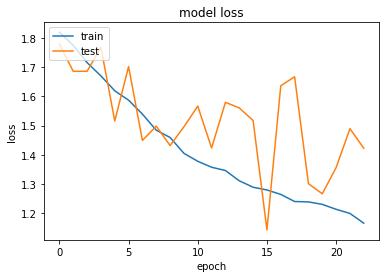

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()